# Primer Intento de clasificador



Como el titulo lo dice, primer intento de clasificador usando como referencia el laboratorio x .
Se considera para este caso el archivo movies_final_imdb el cual contiene:
    
    movieId+nota_imbd_aprox+duracion+categoria+actores+directores
    
    
Nota : Falta agregar los directores y quizas las fechas para ve como cambia. 

In [1]:
## Librerias Basicas:
import csv
import numpy as np
import pandas as pd

#Metricas y Estadisticas:
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn import cross_validation


# Clasificadores : Tree, SVM, RandomForest, Regression, Naive Bayes,KNN......
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression



Cargamos los datasets.

In [2]:
movies = pd.read_csv("movies_final.csv", header = 0)
score = pd.read_csv("movielens.csv", header = 0)

movies_header = list(movies.columns.values)
movies = movies.as_matrix()

score = np.ravel(score.as_matrix())

# Clasificadores y Validación.





Esta nueva seccion calcula el promedio del accuracy de varios tipos de clasificadores y despues corre un test estadistico para determinar si existe una diferencia significativa entre el clasificador que se está probando y los otros.

~Algo asi como un cross validation.


Definimos las funciones del clasificador:

In [3]:
#Variar el num_test modifica la probabilidad de estar mas cerca del promedio al hacer un t-test. 
#Creo que con 35 es suficiente para ese tipo de distribuciones.

def run_classifier(clf, X, y, num_tests=10):
    scores = []
    reports = []
    
    for i in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))

    return np.array(scores)

Clasificadores usados:

In [4]:
c0 = ("Base", DummyClassifier(strategy='stratified'))
c1 = ("SVM", SVC(kernel='linear'))
c2 = ("DT", DecisionTreeClassifier())
c3 = ("NB", GaussianNB())
c4 = ("KNN", KNeighborsClassifier(n_neighbors=5))
c5 = ("RandomForest", RandomForestClassifier(n_estimators=10))
c6 = ("LogisticRegression",LogisticRegression())

classifiers = [c0, c1, c2, c3, c4,c5,c6]
result_list = []

Corremos las pruebas para cada test. 

In [ ]:
#Funcion Pesada, correr solo una vez. 

for name, clf in classifiers:
    accuracys = run_classifier(clf ,movies , score)
    result_list.append((name, accuracys))
    

In [ ]:
#Impresion de los resultados

print("+ indica diferencia significativa\n")

for name1, results1 in result_list:
    print("Comparando %s - Accuracy: %.2f" % (name1, results1.mean()))
    for name2, results2 in result_list:
        if name1 == name2:
            continue

        _, p_value, __ = ttest_ind(results1, results2)
        
        if p_value <= 0.05:
            sig = "+"
        else:
            sig = ""
        print("%s:\t%.2f %s" % (name2, results2.mean(), sig))
    print()

# Predicciones de algunas peliculas

Usando la siguiente funcion, se puede imprimir mas facilmente los resultados y luego calcular algunas metricas importantes. 

In [ ]:
for clf_name, clf in classifiers:
    X_train, X_test, y_train, y_test = train_test_split(movies, score, test_size =  0.50)
    clf.fit(X_train, y_train)
        

In [ ]:
sample_movies = [("Toy Story", movies[0], score[0]),("Avatar", movies[3111], score[3111]),
                 ("Titanic",movies[458],score[458]),("Transformers",movies[4057],score[4057]),
                 ("Never Say Never",movies[4189],score[4189])]
predicted_scores = []

# Toma un vector de tuplas nombre,clasificador y otro de nombre_pelicula,atributos,score_original y
# trata de predecir el score de esto para luego compararlos.
def predict_scores(clf, sample_movies):    
    for clf_name , clf in clf:
        for sample_name, sample_data, sample_score in sample_movies:
            predicted_scores.append((clf_name, sample_name,clf.predict(sample_data),sample_score))
    return predicted_scores

res = predict_scores(classifiers, sample_movies)

def predict_scores_toString(predicted_scores):
    string = "Clf\t\t\tNombrePelicula\t\t\tNotaPredicha\t\tNotaReal\n"
    for item in predicted_scores:
        for elements in item:
            string = str(string) + str(elements) + "\t\t\t"
        string = str(string) + "\n"
    return string
        
#Muchos Warnings :(        

res2 = predict_scores_toString(res)
print res

# Busqueda del mejor train test

A traves de graficos, trataremos de buscar el mejor test-train para cada clasificador.

In [5]:
def create_intervals(number):
    intervals = []
    for i in range(number):
        intervals.append(float(i)/number)
    
    return intervals[1:]

In [6]:
# Funcion que determina la mejor proporcion del conjunto de entrenamiento. 

def best_test_size(clf, X, y, num_test, test_iterations):
    scores_final = []
    scores = []
    intervals = create_intervals(num_test)

    for i in intervals:
        for j in range(test_iterations):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
            clf.fit(X_train, y_train)
            scores.append(clf.score(X_test, y_test))
        

        scores_final.append(sum(scores) / float(len(scores)))
        scores = []
    print scores_final  
    return np.array(scores_final)

CLF Actual: Base
[0.47533632286995514, 0.45847362514029177, 0.45995508982035926, 0.45592363840539019, 0.45709793351302785, 0.45059880239520961, 0.45428296438883542, 0.45676586187535095, 0.45258297978537559]


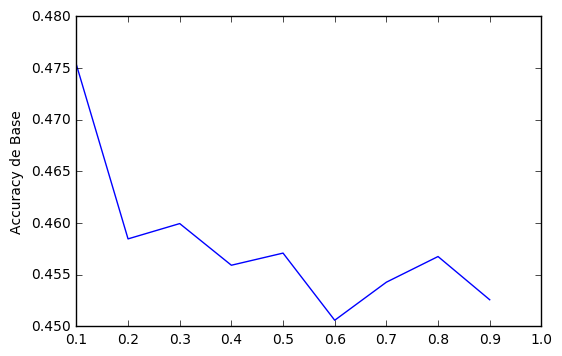

CLF Actual: SVM
[0.58632286995515703, 0.62570145903479246, 0.62425149700598803, 0.59657495788882653, 0.60467205750224617, 0.60291916167664672, 0.59223612447866536, 0.59601347557551931, 0.58684801597204894]


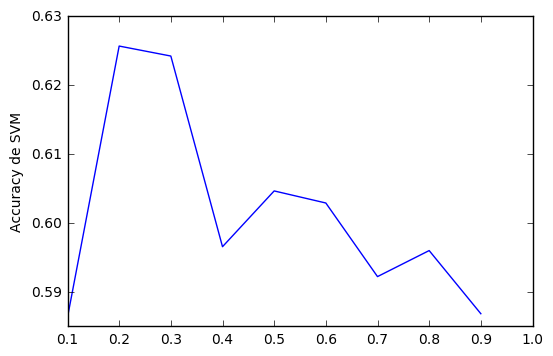

CLF Actual: DT
[0.52130044843049328, 0.53872053872053871, 0.53218562874251507, 0.54604154969118479, 0.55345911949685533, 0.53106287425149701, 0.53400705806865578, 0.53663672094329029, 0.54180184676815579]


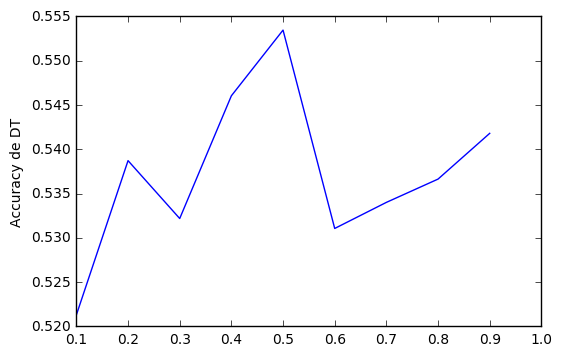

CLF Actual: NB
[0.33632286995515692, 0.36475869809203143, 0.3869760479041916, 0.39865244244806286, 0.39982030548068281, 0.38641467065868262, 0.38354186717998073, 0.40089837170129139, 0.35662590466683308]


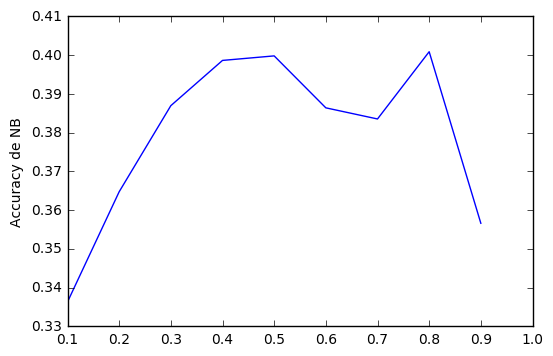

CLF Actual: KNN
[0.55269058295964124, 0.53703703703703698, 0.53892215568862278, 0.53453116226838859, 0.53975741239892183, 0.53218562874251507, 0.53529034327879366, 0.5377596855699045, 0.5413027202395807]


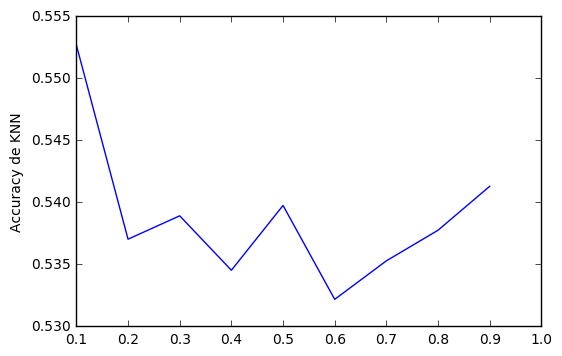

CLF Actual: RandomForest
[0.570627802690583, 0.55387205387205385, 0.58532934131736525, 0.56737787759685565, 0.56154537286612749, 0.57035928143712566, 0.57266602502406161, 0.55937675463222913, 0.54903918143249308]


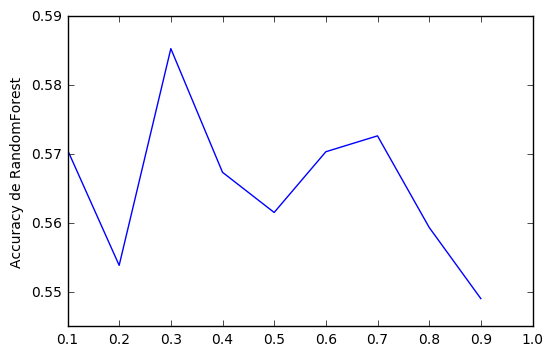

CLF Actual: LogisticRegression
[0.63004484304932729, 0.6301907968574636, 0.63211077844311381, 0.61398090960134755, 0.62264150943396235, 0.60853293413173648, 0.61164581328200196, 0.60962942167321732, 0.59171449962565514]


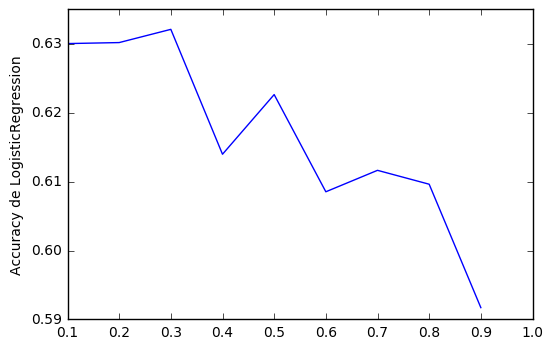

In [7]:
import matplotlib.pyplot as plt

test_size_results = []

for clf_name, clf in classifiers:
    print "CLF Actual: " + clf_name
    test_results = best_test_size (clf, movies, score, 10,2) 
    #print test_results
    plt.plot(create_intervals(10),test_results)
    plt.ylabel('Accuracy de '+ clf_name)
    plt.show()
    test_size_results = []

In [ ]:
Conclusion. Aparentemente, SVM con Logit

## Mejor Parametro KNN (numero de vecinos)

Accuracy de KNN con 30 parametros y 15 iteraciones x parametro.
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


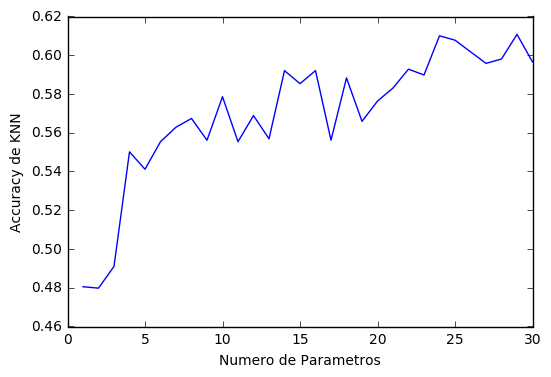

In [8]:
def best_parameter_KNN(X, y,parameters,tsize):
    scores = []
    param = []
    
    for i in range(parameters):
        param.append(i+1)
        for j in range(tsize):
            results = []
            clf = KNeighborsClassifier(n_neighbors=i+1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
            clf.fit(X_train, y_train)
            results.append(clf.score(X_test, y_test))
        
        scores.append(sum(results) / float(len(results)))
        results = []
    #Imprimo el grafico!
                      
    print 'Accuracy de KNN con ' + str(parameters) + ' parametros y ' + str(tsize) + ' iteraciones x parametro.'
    print param
    plt.plot(param,scores)
    plt.ylabel('Accuracy de KNN') 
    plt.xlabel('Numero de Parametros')
    plt.show()
    
    

best_parameter_KNN(movies,score,30,15)


In [ ]:
## Mejor Parametro RandomForest

Accuracy de KNN con 30 parametros y 15 iteraciones x parametro.
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


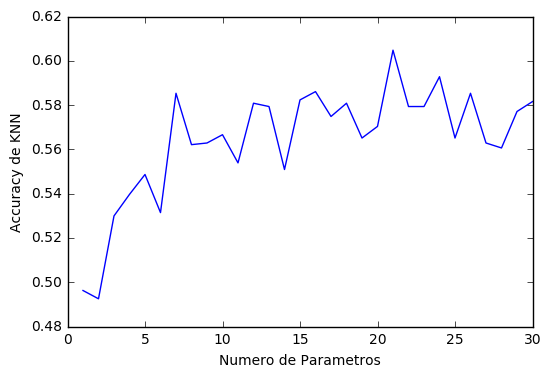

In [10]:
def best_parameter_RF(X, y,parameters,tsize):
    scores = []
    param = []
    
    for i in range(parameters):
        param.append(i+1)
        for j in range(tsize):
            results = []
            clf = RandomForestClassifier(n_estimators=i+1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
            clf.fit(X_train, y_train)
            results.append(clf.score(X_test, y_test))
        
        scores.append(sum(results) / float(len(results)))
        results = []
    #Imprimo el grafico!
                      
    print 'Accuracy de KNN con ' + str(parameters) + ' parametros y ' + str(tsize) + ' iteraciones x parametro.'
    print param
    plt.plot(param,scores)
    plt.ylabel('Accuracy de KNN') 
    plt.xlabel('Numero de Parametros')
    plt.show()
    
    

best_parameter_RF(movies,score,30,15)

### Test 2

Para llegar a este test se hizo lo siguiente :

    1.Se determino en el test1 cuales eran los clasificadores que daban mejores resultados.

    2.Se determino (solo para 0.30 el tamaño del dataset) cuales eran los mejores parametros para random forest tree y KNN.

Aun falta :

Determinar los mejores resultados (usando algun algoritmo greedy) cual es el optimo de parametros para knn y random forest.



CLF Actual: Base
[0.46233183856502241, 0.45925925925925926, 0.45089820359281435, 0.44924199887703536, 0.44725965858041328, 0.4538547904191616, 0.44529996791786974, 0.45106681639528351, 0.45205889693037193]


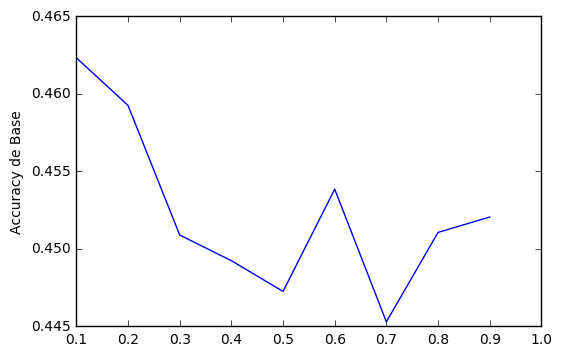

CLF Actual: SVM
[0.61704035874439467, 0.60695847362514033, 0.60995508982035918, 0.60836608646827628, 0.60404312668463622, 0.60086077844311381, 0.59746551170997753, 0.59053902302077477, 0.58565011230346897]


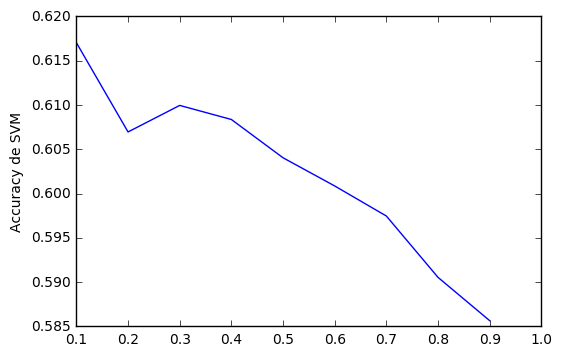

CLF Actual: KNN
[0.58856502242152453, 0.6016835016835016, 0.58884730538922159, 0.59163391353172379, 0.58522012578616356, 0.58854790419161673, 0.59095283926852737, 0.59239191465468843, 0.59129024207636638]


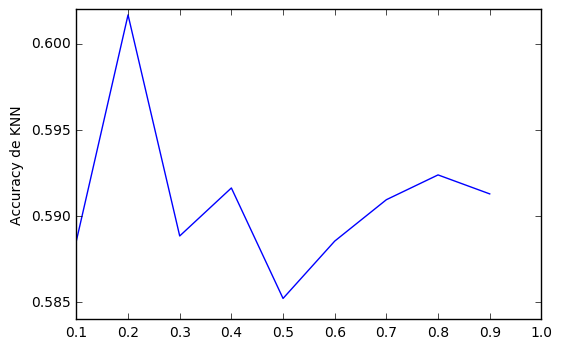

CLF Actual: RandomForest
[0.58587443946188345, 0.57777777777777772, 0.57110778443113785, 0.57697922515440758, 0.57717879604672062, 0.57499999999999996, 0.56884825152390117, 0.5786075238629983, 0.57154978787122546]


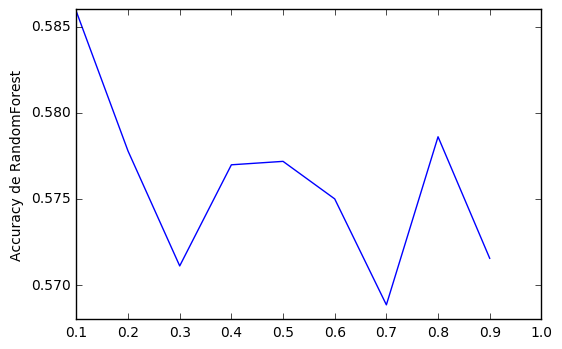

CLF Actual: LogisticRegression
[0.62713004484304924, 0.62525252525252528, 0.62597305389221558, 0.6210555867490174, 0.61778975741239894, 0.61934880239520962, 0.61158164902149514, 0.60819764177428415, 0.6023209383578737]


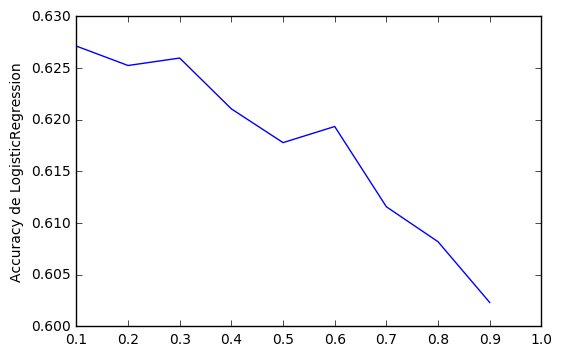

In [14]:
# Test 2 . Parametros :

#Numero de intervalos probados.
intervalos2 = 10
#Numero de iteraciones probadas.
iteraciones2 = 10

test_size_results = []

c00 = ("Base", DummyClassifier(strategy='stratified'))
c11 = ("SVM", SVC(kernel='linear'))
c22 = ("KNN", KNeighborsClassifier(n_neighbors=23))
c33 = ("RandomForest", RandomForestClassifier(n_estimators=22))
c44 = ("LogisticRegression",LogisticRegression())

classifiers2 = [c00, c11, c22, c33, c44]

for clf_name, clf in classifiers2:
    test_results2 = best_test_size (clf, movies, score, intervalos2,iteraciones2) 
    #print test_results
    plt.plot(create_intervals(10),test_results2)
    plt.ylabel('Accuracy de '+ clf_name)
    plt.show()
    test_size_results2 = []

# Parte de los clasificadores - Version Antigua, ineficiente y hedionda a poto.

## KNN basico



In [ ]:
# Primer Clasificador : K-nearnest-neighbors

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(movies, score)
score_pred = knn.predict(movies)
print accuracy_score(score, score_pred)

print(classification_report(score,score_pred))

## KNN manual


In [ ]:
# Primer Clasificador : K-nearnest-neighbors


X_train, X_test, y_train, y_test = cross_validation.train_test_split(movies, score, test_size=0.33)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))


## KNN - Cross Validation

In [ ]:
knn_cross = cross_validation.cross_val_score(knn, movies, score, cv=3)

print knn_cross
print("Accuracy: %0.2f (+/- %0.2f)" % (knn_cross.mean(), knn_cross.std() * 2))




Mejora al momento de reducir las clases

## Support Vector Machine - SVM

In [ ]:

movies_svm = svm.SVC()
movies_svm.fit(movies, score)  

score_pred = movies_svm.predict(movies)
accuracy_score(score, score_pred)

print(classification_report(score,score_pred))


## SVM con Cross-Validation

In [ ]:
svm_cross = svm.SVC()
cross = cross_validation.cross_val_score(svm_cross, movies, score, cv=10)

#Estadisticos respecto al cross validation
print cross
print("Accuracy: %0.2f (+/- %0.2f)" % (cross.mean(), cross.std() * 2))

#Res previos [ 0.61771058  0.60606061  0.60505415]
#Accuracy: 0.61 (+/- 0.01)

## SVM test set manual

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(movies, score, test_size=0.33, random_state=45)


svm_manual = svm.SVC()
svm_manual.fit(X_train, y_train)
y_pred = svm_manual.predict(X_test)
accuracy_score(y_test, y_pred)
# test_size, random_state
# 0,33 , 37 -> 0.59863945578231292
# 0,33 , 45 -> 0.61360544217687074
# 0,33 , 80 -> 0.60612244897959189

# 0,66 , 37 -> 0.60598843143926506
# 0,66 , 45 -> 0.60428717250765562


## Random Forest

## Random forest con cross validation.

In [ ]:
#Random forest con cross-validation.

forest_cross = RandomForestClassifier(n_estimators=10)
forest_cross_score = cross_validation.cross_val_score(forest_cross, movies, score, cv=3)
print forest_cross_score
print("Accuracy: %0.2f (+/- %0.2f)" % (forest_cross_score.mean(), forest_cross_score.std() * 2))


# cv = 3, n = 10
# array([ 0.54456929,  0.57389347,  0.54954955])

# cv = 3, n = 10
# array([ 0.55735661,  0.57927591,  0.59699625,  0.55319149,  0.57446809])



## Random Forest test set Manual

In [ ]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(movies, score, test_size=0.3)
#, random_state=37

forest_manual = RandomForestClassifier(n_estimators=10)
forest_manual.fit(X_train, y_train)
y_pred = forest_manual.predict(X_test)
accuracy_score(y_test, y_pred)


# test_size = 0.33
# 0.57166666666666666

# test_size = 0.5
# 0.55449999999999999


## Arbol de Decision

In [ ]:
movies_tree = tree.DecisionTreeClassifier()
cross_validation.cross_val_score(movies_tree, movies, score, cv=10)


Aparentemente, tanto el arbol de decision como random forest tree no tienen un rendimiento mejor que los otros. ¿Por qué?

## Dummy Classifier

Que debemos hacer ahora ? -> Validar los modelos comparandolos con un dummy 